In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

Problems referenced from: https://elephantscale.github.io/
For more problems visit the link above.

# B2 - Create a numpy array of numbers from 1 to 10. Print out elements after index 2 (★☆☆)
Hint: np.arange and [2:]<br>
Expected result: [3,4,5,6,7,8,9,10]<br>

In [2]:
numbers = np.arange(1,11)
numbers[2:]
numbers


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Numpy's arange function operates very similarly to that of python's builtin range function. The function returns a sequence of values starting from the starting value terminating at the ending value, where the specified ending value is not included in the sequence of values returned. Slicing operates similarly to that of Python lists, tuples, & sets. 


D2 - Create a multi-dimensional 3x3x3 array with random numbers between 1 and 10. Print out the sum of all elemenets (★★☆)<br>
Hint: np.sum<br>

In [3]:
m = np.random.randint(1,11,[3,3,3])
print(m)
np.sum(m)


[[[10  3  5]
  [ 2  3  4]
  [ 8  4  2]]

 [[ 6  3  8]
  [ 6  2  8]
  [ 4  3  4]]

 [[ 5  3  6]
  [ 8  8  6]
  [ 2 10  7]]]


140

Numpy's random.randint function generates a random value between the given starting value and terminating value. Note that the starting value and terminating values behave similarly to that of numpy's arange as well as python's builtin range behavior when defining an interval $[v_0, v_f)$. Starting values are defined as an existing value in the sequence, while terminating values do no exist in the sequence. <br>

Lastly, randint accepts an array-like input for defining the shape of the n-d array. Tuples & lists are acceptable shape inputs.

# Create the following dataframe (★☆☆)<br>
## Part 1)<br>
Expected output:<br>
           city  		population  	rainfall<br>
0       	San Jose          	10      	15.5<br>
1  	San Francisco          	 5      	10.2<br>
2    	Los Angeles          	30       5.5<br>
3        	Seattle           		7      	50.5<br><br>
## Part 2) <br>
Create a bar chart using the data from A4 plotting the city vs rainfall.<br>

In [4]:
# part 1
data_dict = {
    "city": ["San Jose", "San Francisco", "Los Angeles", "Seattle"],
    "population": [10, 5, 30, 7],
    "rainfall": [15.5, 10.2, 5.5, 50.5]
}

Create a dictionary of lists. Recalling from the pandas docs, instantiation of a pandas.DataFrame can be done in multitple approaches. This approach allows one to define column names as keys, while values are defined to be a list/tuple. Note that order of elements in the lists are important because they correspond to each row.

In [5]:
df = pd.DataFrame(data_dict)
df

,city,population,rainfall
0,San Jose,10,15.5
1,San Francisco,5,10.2
2,Los Angeles,30,5.5
3,Seattle,7,50.5


Pass the data into the pandas.DataFrameas an argument to create the instance

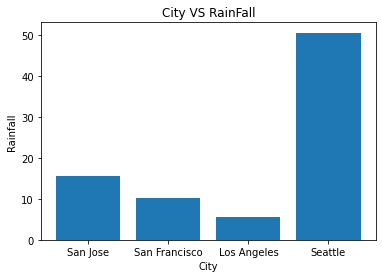

In [6]:
# part 2
plt.bar(x=df["city"], height=df['rainfall'])
plt.title("City VS RainFall")
plt.xlabel("City")
plt.ylabel("Rainfall")
plt.show()
# print(plt.bar.__doc__) # method of looking at documentation without access to the web

# Ex-1 - Work with 2 lists (★★☆)<br>
a = [1,5,2,10,7,4,6]<br>
b = [1,4,3]<br>
## Part 1
Print all numbers common to a and b (★★☆)<br>
## Part 2
Print all numbers unique to a (not in b) (★★☆)<br>

In [7]:
a = [1,5,2,10,7,4,6]
b = [1,4,3]

print("Common in A and B:")
# print common in a and b
# list comprehension & if condition appraoch
common = [e for e in a if e in b]
print("List Comprehension",common)

# set approach
a = set(a)
b = set(b)
common = b.intersection(a) 
print("Set Approach",common)

print("Unique to A:")
unique = [e for e in a if e not in b]
print("List Comprehension:", unique)

unique = a.difference(b)
print("Set Approach:", unique)
# print(a.intersection(b))

Common in A and B:
List Comprehension [1, 4]
Set Approach {1, 4}
Unique to A:
List Comprehension: [2, 5, 6, 7, 10]
Set Approach: {2, 5, 6, 7, 10}


Note that this method assumes each list to be a set which makes sense if one is only interested in the single occurence of unique values existing in both collections. This method is more understandable if one is familiar with sets in math and even provides commonly used syntax from set theory. Intersection algo runs at O(min(len(a),len(b))), therefore in this problem it'd be O(3). Alternative & naive brute-force approaches are explored in the following sections.

In [8]:
intersections = []
a = [1,1,1,1,5,2,10,7,4,6]
b = [1,4,3]
for elem_a in a:
    for elem_b in b:
        if elem_a == elem_b:
            print(elem_a,elem_b)
            intersections.append((elem_a,elem_b))
print(intersections)

1 1
1 1
1 1
1 1
4 4
[(1, 1), (1, 1), (1, 1), (1, 1), (4, 4)]


Another method of approaching the problem that accounts for repetition at the cost of operating at a slower computational rate of O(n^2) as a result of the nested for loops. A

In [9]:
intersections = [(elem_a, elem_b) for elem_b in b for elem_a in a if elem_a == elem_b]
intersections

[(1, 1), (1, 1), (1, 1), (1, 1), (4, 4)]

Alternative solution of accounting for repititions still running at O(n^2) while running slightly faster because of the one-line declaration. The Python JIT compiler is able to interpret the one line and compile to the needed lower level code to run. This does some at a slight cost of syntax as it crams for-loops and conditionals into a list all in one-line.

In [10]:
intersections = set([(elem_a, elem_b) for elem_b in b for elem_a in a if elem_a == elem_b])
intersections

{(1, 1), (4, 4)}

The alternative if simply interested in the unique occurence ran at O(n^2) because of the naive brute-force approach of the nesting for-loops. Claims of JIT compiler being significant are in my opinion subjective; however, I have been taught that the number of lines in a python program are things to consider because as mentioned before, the just-in-time (JIT) compiler is reading each line from which it converts into runnable code bytes before moving onto the next line. This would be a fun experiment to benchmark. 

# B2
Get the frequency of the elements in a list (★★☆)<br>
For example if the list is<br>
['a', 'b', 'a', 'c', 'b', 'a'] <br>
Expected output is :<br>
 'a' -> 3,<br>
  'b' -> 2,<br>
  'c' -> 1<br>

In [11]:
# approach 1
from collections import Counter
items = ['a', 'b', 'a', 'c', 'b', 'a']
freq = Counter(items) # one liner
print("Counter Approach:",freq)

# approach 2
freq = {}
for e in items:
    if e not in freq.keys():
        freq[e] = 1
    else:
        freq[e] += 1
print("For Loop If-Else Approach:",freq)
        

Counter Approach: Counter({'a': 3, 'b': 2, 'c': 1})
For Loop If-Else Approach: {'a': 3, 'b': 2, 'c': 1}


Usage of Counter from std python collection lib makes it easy to tally up element occurences. Alternatively usage of a for-loop is also acceptable; however, is verbose and non-pythonic.

# Loops
## B1 
Write a for loop printing 1 to 10
## B2
Write a for loop printing 1 to 10, but in steps of 2 (e.g. 1, 3, 5, 7, 9)

In [12]:
# B1)
print("B1:")
items = [a for a in range(11)]
print("Vertical 1 Print:")
# vertical print
for i in items:
    print(i)
print()
print("Vertical 2 Print:")
print("\n".join([str(i) for i in items]))
print()

print("Horizontal Print:")
# horiztontally joined
print(",".join([str(i) for i in items]))
print()

# B2)
print("B2:")
print("Vertical Print:")
for i in range(1, len(items), 2):
    print(items[i])
print()
print("Horizontal Print:")
print(",".join([str(items[i]) for i in range(1, len(items), 2)]))


B1:
Vertical 1 Print:
0
1
2
3
4
5
6
7
8
9
10

Vertical 2 Print:
0
1
2
3
4
5
6
7
8
9
10

Horizontal Print:
0,1,2,3,4,5,6,7,8,9,10

B2:
Vertical Print:
1
3
5
7
9

Horizontal Print:
1,3,5,7,9


Either horizontal or vertical methods of printing the list of elements would have been acceptable per the requirement of using a for-loop. Alternative methods of solving the problem were explored for understanding different use cases (horizontal/vertical) as well as syntatical complexity & verbosity (one liners with list comprehension and str.join).

# If-Else<br>
A1 - Write if/else to print if a number if odd or even<br>
A2 - Write if-else-if-else to print grade.<br>
If score > 90 grade is A.<br>
If score is between 80 and 90 then grade is B.<br>
If score is between 70 and 80 then grade is C.<br>

In [13]:
score = 85
grade = "NA"
if score > 90:
    grade = "A"
elif score > 80 and score < 90:
    grade = "B"
elif score > 70 and score < 80:
    grade = "C"
print("Your grade is:",grade)
    

Your grade is: B


In [16]:
# one liner
grade = "A" if (score > 90) else "B" if( score > 80 and score < 90) else "C" if (score > 70 and score <80) else "NA"
print("Your grade is:",grade)

Solutions show cases of acceptable answers while providing examples of contrasting readability. Note that the 2nd solution requires usage of else for the one-line expression to be interpretted correctly. 


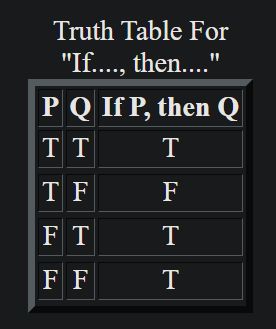

Observing that there are multitple if-then statements in the problem. We can devise the solution by drawing from the logic shown in the truth above. Note that "elif" means the phrase "...else if..." suggesting a continuation into another conditional statement.